In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import openpyxl as xl
import statsmodels.api as sm
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import het_breuschpagan
from tabulate import tabulate
from colorama import Fore, Back, Style
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
import ipywidgets as widgets
from IPython.display import display
import dash
from dash import dcc
from dash import html
from scipy import stats
from dash.dependencies import Input,Output
from jupyter_dash import JupyterDash


In [2]:
Part1_2010 = pd.read_excel(r"C:\Users\achar\Desktop\R HW Problems\2010_Part1.xlsx")
Part2_2010 = pd.read_excel(r"C:\Users\achar\Desktop\R HW Problems\2010_Part2.xlsx")
Part1_2015 = pd.read_excel(r"C:\Users\achar\Desktop\R HW Problems\2015_Part1.xlsx")
Part2_2015 = pd.read_excel(r"C:\Users\achar\Desktop\R HW Problems\2015_Part2.xlsx")
Dataset_2020 = pd.read_excel(r"C:\Users\achar\Desktop\R HW Problems\2020_Dataset.xlsx")

In [7]:
Part1_2010

,Year,Loan Number,FHLBankID,Program,FIPSStateCode,FIPSCountyCode,MSA,FeatureID,Tract,MinPer,...,Purpose,Coop,Product,FedGuar,Term,AmorTerm,FHFBID,Seller,SellCity,SellSt
0,2010,1,Boston,1,4,13,99999,37065,101.00,3.64,...,2,2,1,0,180,180,54835,General Electric Employe,Milford,CT
1,2010,2,Boston,1,9,1,99999,205720,726.00,24.22,...,2,2,1,0,360,360,54835,General Electric Employe,Milford,CT
2,2010,3,Boston,1,9,1,99999,206996,612.00,11.32,...,2,2,1,0,180,180,54835,General Electric Employe,Milford,CT
3,2010,4,Boston,1,9,1,99999,209223,431.00,17.00,...,1,2,1,0,360,360,11903,Salisbury Bank and Trust,Lakeville,CT
4,2010,5,Boston,1,9,1,99999,209274,2302.00,5.32,...,2,2,1,0,240,240,54109,Western Connecticut Fede,Sandy Hook,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41215,2010,41216,Topeka,5,51,99,99999,1498500,9903.00,17.98,...,2,2,1,1,360,360,10157,Farmers Bank & Trust NA,Great Bend,KS
41216,2010,41217,Topeka,5,51,107,47894,9999999999,6110.07,17.30,...,2,2,1,1,360,360,10157,Farmers Bank & Trust NA,Great Bend,KS
41217,2010,41218,Topeka,5,51,550,99999,1496841,210.05,29.73,...,2,2,1,2,360,360,11778,The First National Bank,Junction City,KS
41218,2010,41219,Topeka,5,53,29,99999,1512518,9706.02,24.58,...,2,2,1,2,360,360,10157,Farmers Bank & Trust NA,Great Bend,KS


In [8]:
Part2_2010

,Year,Loan Number,FHLBankID,Program,FIPSStateCode,FIPSCountyCode,MSA,FeatureID,SellType,NumBor,...,Corace2,Corace3,Corace4,Corace5,HOEPA,LienStatus,SpcHsgGoals,FedFinStbltyPlan,AcqTyp,GSEREO
0,2010,1,Boston,1,4,13,99999,37065,1,2,...,6,6,6,6,2,1,2,2,1,2
1,2010,2,Boston,1,9,1,99999,205720,1,2,...,6,6,6,6,2,1,2,2,1,2
2,2010,3,Boston,1,9,1,99999,206996,1,1,...,8,8,8,8,2,1,2,2,1,2
3,2010,4,Boston,1,9,1,99999,209223,1,2,...,6,6,6,6,2,1,2,2,1,2
4,2010,5,Boston,1,9,1,99999,209274,1,2,...,6,6,6,6,2,1,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41215,2010,41216,Topeka,5,51,99,99999,1498500,1,2,...,6,6,6,6,2,1,2,2,1,2
41216,2010,41217,Topeka,5,51,107,47894,9999999999,1,2,...,6,6,6,6,2,1,2,2,1,2
41217,2010,41218,Topeka,5,51,550,99999,1496841,1,2,...,6,6,6,6,2,1,2,2,1,2
41218,2010,41219,Topeka,5,53,29,99999,1512518,1,2,...,6,6,6,6,2,1,2,2,1,2


In [3]:
Part2_2010.drop(['Year', 'FHLBankID', 'Program', 'FIPSCountyCode', 'FIPSStateCode', 'MSA', 'FeatureID'], inplace=True, axis=1)

In [15]:
Part2_2010

,Loan Number,SellType,NumBor,First,CICA,BoRace,CoRace,BoGender,CoGender,BoAge,...,Corace2,Corace3,Corace4,Corace5,HOEPA,LienStatus,SpcHsgGoals,FedFinStbltyPlan,AcqTyp,GSEREO
0,1,1,2,2,9,5,5,2,1,45,...,6,6,6,6,2,1,2,2,1,2
1,2,1,2,2,9,5,5,1,2,53,...,6,6,6,6,2,1,2,2,1,2
2,3,1,1,2,9,5,8,2,4,55,...,8,8,8,8,2,1,2,2,1,2
3,4,1,2,2,9,5,5,2,1,99,...,6,6,6,6,2,1,2,2,1,2
4,5,1,2,2,9,7,5,1,2,69,...,6,6,6,6,2,1,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41215,41216,1,2,2,9,7,7,1,2,99,...,6,6,6,6,2,1,2,2,1,2
41216,41217,1,2,2,9,2,2,1,2,99,...,6,6,6,6,2,1,2,2,1,2
41217,41218,1,2,2,9,5,5,1,2,40,...,6,6,6,6,2,1,2,2,1,2
41218,41219,1,2,2,9,5,5,1,2,99,...,6,6,6,6,2,1,2,2,1,2


In [4]:
merged_2010 = pd.merge(Part1_2010, Part2_2010, on=['Loan Number'])

In [17]:
merged_2010

,Year,Loan Number,FHLBankID,Program,FIPSStateCode,FIPSCountyCode,MSA,FeatureID,Tract,MinPer,...,Corace2,Corace3,Corace4,Corace5,HOEPA,LienStatus,SpcHsgGoals,FedFinStbltyPlan,AcqTyp,GSEREO
0,2010,1,Boston,1,4,13,99999,37065,101.00,3.64,...,6,6,6,6,2,1,2,2,1,2
1,2010,2,Boston,1,9,1,99999,205720,726.00,24.22,...,6,6,6,6,2,1,2,2,1,2
2,2010,3,Boston,1,9,1,99999,206996,612.00,11.32,...,8,8,8,8,2,1,2,2,1,2
3,2010,4,Boston,1,9,1,99999,209223,431.00,17.00,...,6,6,6,6,2,1,2,2,1,2
4,2010,5,Boston,1,9,1,99999,209274,2302.00,5.32,...,6,6,6,6,2,1,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41215,2010,41216,Topeka,5,51,99,99999,1498500,9903.00,17.98,...,6,6,6,6,2,1,2,2,1,2
41216,2010,41217,Topeka,5,51,107,47894,9999999999,6110.07,17.30,...,6,6,6,6,2,1,2,2,1,2
41217,2010,41218,Topeka,5,51,550,99999,1496841,210.05,29.73,...,6,6,6,6,2,1,2,2,1,2
41218,2010,41219,Topeka,5,53,29,99999,1512518,9706.02,24.58,...,6,6,6,6,2,1,2,2,1,2


In [19]:
Part1_2015

,Year,AssignedID,FHLBank,FIPSStateCode,FIPSCountyCode,MSA,FeatureID,Tract,MinPer,TraMedY,...,Purpose,Coop,Product,FedGuar,Term,AmorTerm,SellType,NumBor,First,CICA
0,2015,1997542,Atlanta,51,69,49020,1740338,511.01,16.96,88049,...,2,2,1,2,360,360,1,1,2,9
1,2015,1997543,Atlanta,18,39,21140,435227,5.02,30.64,47088,...,1,2,1,2,360,360,1,2,2,9
2,2015,1997544,Atlanta,13,245,12260,356262,109.03,35.36,66219,...,2,2,1,2,360,360,1,2,2,9
3,2015,1997545,Atlanta,12,9,37340,294589,644.00,13.56,51191,...,2,2,1,2,360,360,1,2,2,9
4,2015,1997546,Atlanta,32,3,29820,847388,32.32,22.33,101161,...,1,2,1,2,360,360,1,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47475,2015,1995296,Topeka,31,63,99999,9999999999,9611.00,2.50,53494,...,1,2,1,0,360,360,1,1,2,9
47476,2015,1995297,Topeka,20,45,29940,479145,7.02,19.13,75625,...,1,2,1,0,360,360,1,2,1,9
47477,2015,1995298,Topeka,40,73,99999,1094390,9582.00,15.71,56131,...,2,2,1,0,360,360,1,2,2,9
47478,2015,1995299,Topeka,8,87,22820,204721,1.00,13.31,69821,...,1,2,1,0,360,360,1,2,2,9


In [20]:
Part2_2015

,Year,AssignedID,FHLBank,FIPSStateCode,FIPSCountyCode,MSA,FeatureID,BoRace,CoRace,BoGender,...,CoRace2,CoRace3,CoRace4,CoRace5,HOEPA,LienStatus,SpcHsgGoals,FedFinStbltyPlan,AcqTyp,GSEREO
0,2015,1997542,Atlanta,51,69,49020,1740338,7,8,1,...,8,8,8,8,2,1,2,2,1,2
1,2015,1997543,Atlanta,18,39,21140,435227,5,5,1,...,6,6,6,6,2,1,2,2,1,2
2,2015,1997544,Atlanta,13,245,12260,356262,7,7,1,...,6,6,6,6,2,1,2,2,1,2
3,2015,1997545,Atlanta,12,9,37340,294589,5,5,1,...,6,6,6,6,2,1,2,2,1,2
4,2015,1997546,Atlanta,32,3,29820,847388,5,5,1,...,6,6,6,6,2,1,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47475,2015,1995296,Topeka,31,63,99999,9999999999,5,8,1,...,8,8,8,8,2,1,1,2,1,2
47476,2015,1995297,Topeka,20,45,29940,479145,5,5,1,...,6,6,6,6,2,1,2,2,1,2
47477,2015,1995298,Topeka,40,73,99999,1094390,5,5,1,...,6,6,6,6,2,1,2,2,1,2
47478,2015,1995299,Topeka,8,87,22820,204721,5,5,1,...,6,6,6,6,2,1,2,2,1,2


In [5]:
Part2_2015.drop(['Year','FHLBank', 'FIPSStateCode', 'FIPSCountyCode', 'MSA', 'FeatureID'], inplace=True, axis=1)

In [6]:
merged_2015 = pd.merge(Part1_2015, Part2_2015, on=['AssignedID'])

In [23]:
merged_2015

,Year,AssignedID,FHLBank,FIPSStateCode,FIPSCountyCode,MSA,FeatureID,Tract,MinPer,TraMedY,...,CoRace2,CoRace3,CoRace4,CoRace5,HOEPA,LienStatus,SpcHsgGoals,FedFinStbltyPlan,AcqTyp,GSEREO
0,2015,1997542,Atlanta,51,69,49020,1740338,511.01,16.96,88049,...,8,8,8,8,2,1,2,2,1,2
1,2015,1997543,Atlanta,18,39,21140,435227,5.02,30.64,47088,...,6,6,6,6,2,1,2,2,1,2
2,2015,1997544,Atlanta,13,245,12260,356262,109.03,35.36,66219,...,6,6,6,6,2,1,2,2,1,2
3,2015,1997545,Atlanta,12,9,37340,294589,644.00,13.56,51191,...,6,6,6,6,2,1,2,2,1,2
4,2015,1997546,Atlanta,32,3,29820,847388,32.32,22.33,101161,...,6,6,6,6,2,1,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47475,2015,1995296,Topeka,31,63,99999,9999999999,9611.00,2.50,53494,...,8,8,8,8,2,1,1,2,1,2
47476,2015,1995297,Topeka,20,45,29940,479145,7.02,19.13,75625,...,6,6,6,6,2,1,2,2,1,2
47477,2015,1995298,Topeka,40,73,99999,1094390,9582.00,15.71,56131,...,6,6,6,6,2,1,2,2,1,2
47478,2015,1995299,Topeka,8,87,22820,204721,1.00,13.31,69821,...,6,6,6,6,2,1,2,2,1,2


In [7]:
FHL_2010 = merged_2010[['Year', 'FHLBankID', 'Tract', 'FIPSStateCode', 'FIPSCountyCode','MinPer', 'TraMedY', 'CurAreY', 'LocMedY', 'LTV', 'Purpose', 'FedGuar', 'Front','Back', 'CoRace', 'BoRace', 'CoGender', 'BoGender', 'Occup','Borrower Credit Score','Co-Borrower Credit Score', 'Self', 'HOEPA', 'Amount', 'Rate', 'PropType', 'NumUnits','Income', 'First', 'BoAge', 'CoAge', 'MortDate', 'AcquDate','NumBor']]

In [8]:
FHl_2015 = merged_2015[['Year', 'FHLBank', 'Tract', 'FIPSStateCode', 'FIPSCountyCode','MinPer', 'TraMedY', 'CurAreY', 'LocMedY', 'LTV', 'Purpose', 'FedGuar', 'Front','Back', 'CoRace', 'BoRace', 'CoGender', 'BoGender', 'Occup', 'BoCreditScor','CoCreditScor', 'Self', 'HOEPA', 'Amount', 'Rate', 'PropType','NumUnits', 'Income','First', 'BoAge', 'CoAge', 'MortDate', 'AcqDate','NumBor']]

In [9]:
FHL_2020 = Dataset_2020[['Year','Bank', 'CensusTractIdentifier','FIPSStateNumericCode', 'FIPSCountyCode','CensusTractMinorityRatioPercent','CensusTractMedFamIncomeAmount', 'HUDMedianIncomeAmount',
'LocalAreaMedianIncomeAmount', 'LTVRatioPercent','LoanPurposeType','MortgageType', 'HousingExpenseRatioPercent', 'TotalDebtExpenseRatioPercent','Borrower2Race1Type', 'Borrower1Race1Type', 'Borrower2GenderType',
'Borrower1GenderType','PropertyUsageType', 'Borrower1CreditScoreValue','Borrower2CreditScoreValue', 'EmploymentBorrowerSelfEmployed','HOEPALoanStatusType', 'NoteAmount', 'NoteRatePercent', 'PropertyType',
'PropertyUnitCount', 'TotalMonthlyIncomeAmount', 'BorrowerFirstTimeHomebuyer','Borrower1AgeAtApplicationYears', 'Borrower2AgeAtApplicationYears','NoteDate', 'LoanAcquistionDate', 'BorrowerCount']]

In [10]:
FHL_2010_full = FHL_2010.rename(columns={'FHLBankID':'FHLBankDistrict', 'Tract':'CensusTractIdentifier', 'MinPer': 'CensusTractMinorityRatioPercent', 'TraMedY':'CensusTractMedFamIncomeAmount','CurAreY':'HUDMedianIncomeAmount','LocMedY':'LocalAreaMedianIncomeAmount','LTV':'LTVRatioPercent','Purpose':'LoanPurposeType', 'FedGuar':'MortgageType','Front':'HousingExpenseRatioPercent','Back':'TotalDebtExpenseRatio','CoRace':'CoBorrowerRace','BoRace':'BorrowerRace','CoGender':'CoBorrowerGender','BoGender':'BorrowerGender','Occup':'PropertyUsageType','Borrower Credit Score':'BorrowerCreditScore','Co-Borrower Credit Score':'CoBorrowerCreditScore','Self':'BorrowerSelfEmployed','HOEPA':'HOEPALoanStatusType','Amount':'NoteAmount','Rate':'NoteRatePercent','PropType':'PropertyType','NumUnits':'PropertyUnitCount','Income':'TotalMonthlyIncomeAmount','First':'BorrowerFirstTimeHomebuyer','BoAge':'BorrowerAge','CoAge':'CoBorrowerAge','MortDate':'MortgageOriginated','AcquDate':'MortgageAcquired','NumBor':'BorrowerCount'})


In [11]:
FHL_2015_full = FHl_2015.rename(columns={'FHLBank':'FHLBankDistrict', 'Tract':'CensusTractIdentifier', 'MinPer': 'CensusTractMinorityRatioPercent', 'TraMedY':'CensusTractMedFamIncomeAmount','CurAreY':'HUDMedianIncomeAmount','LocMedY':'LocalAreaMedianIncomeAmount','LTV':'LTVRatioPercent','Purpose':'LoanPurposeType', 'FedGuar':'MortgageType','Front':'HousingExpenseRatioPercent','Back':'TotalDebtExpenseRatio','CoRace':'CoBorrowerRace','BoRace':'BorrowerRace','CoGender':'CoBorrowerGender','BoGender':'BorrowerGender','Occup':'PropertyUsageType','BoCreditScor':'BorrowerCreditScore','CoCreditScor':'CoBorrowerCreditScore','Self':'BorrowerSelfEmployed','HOEPA':'HOEPALoanStatusType','Amount':'NoteAmount','Rate':'NoteRatePercent','PropType':'PropertyType','NumUnits':'PropertyUnitCount','Income':'TotalMonthlyIncomeAmount','First':'BorrowerFirstTimeHomebuyer','BoAge':'BorrowerAge','CoAge':'CoBorrowerAge','MortDate':'MortgageOriginated','AcqDate':'MortgageAcquired','NumBor':'BorrowerCount'})

In [12]:
FHL_2020_full = FHL_2020.rename(columns={'Bank':'FHLBankDistrict','FIPSStateNumericCode':'FIPSStateCode','Borrower2Race1Type':'CoBorrowerRace','Borrower1Race1Type':'BorrowerRace','Borrower2GenderType':'CoBorrowerGender','Borrower1GenderType':'BorrowerGender','Borrower1CreditScoreValue':'BorrowerCreditScore','Borrower2CreditScoreValue':'CoBorrowerCreditScore','EmploymentBorrowerSelfEmployed':'BorrowerSelfEmployed','Borrower1AgeAtApplicationYears':'BorrowerAge','Borrower2AgeAtApplicationYears':'CoBorrowerAge','NoteDate':'MortgageOriginated','LoanAcquistionDate':'MortgageAcquired'})

In [13]:
FHL_2010_full['LTVRatioPercent']=FHL_2010_full['LTVRatioPercent']*100
FHL_2010_full['HousingExpenseRatioPercent'] = FHL_2010_full['HousingExpenseRatioPercent'] * 100
FHL_2010_full['NoteRatePercent'] = FHL_2010_full['NoteRatePercent'] * 100
FHL_2010_full['TotalDebtExpenseRatio']=FHL_2010_full['TotalDebtExpenseRatio']*100

In [14]:
FHL_2015_full['LTVRatioPercent']=FHL_2015_full['LTVRatioPercent']*100
FHL_2015_full['HousingExpenseRatioPercent'] = FHL_2015_full['HousingExpenseRatioPercent'] * 100
FHL_2015_full['NoteRatePercent'] = FHL_2015_full['NoteRatePercent'] * 100
FHL_2015_full['TotalDebtExpenseRatio']=FHL_2015_full['TotalDebtExpenseRatio']*100

In [15]:
FHL_2010_full['TotalMonthlyIncomeAmount']=FHL_2010_full['TotalMonthlyIncomeAmount']/12
FHL_2010_full['TotalMonthlyIncomeAmount']=FHL_2010_full['TotalMonthlyIncomeAmount'].apply(lambda x: round(x,0))

In [16]:
FHL_2015_full['TotalMonthlyIncomeAmount']=FHL_2015_full['TotalMonthlyIncomeAmount']/12
FHL_2015_full['TotalMonthlyIncomeAmount']=FHL_2015_full['TotalMonthlyIncomeAmount'].apply(lambda x: round(x,0))

In [17]:
Data_full_merged = pd.concat([FHL_2010_full,FHL_2015_full,FHL_2020_full])

In [23]:
Data_full_merged

,Year,FHLBankDistrict,CensusTractIdentifier,FIPSStateCode,FIPSCountyCode,CensusTractMinorityRatioPercent,CensusTractMedFamIncomeAmount,HUDMedianIncomeAmount,LocalAreaMedianIncomeAmount,LTVRatioPercent,...,BorrowerFirstTimeHomebuyer,BorrowerAge,CoBorrowerAge,MortgageOriginated,MortgageAcquired,BorrowerCount,TotalDebtExpenseRatioPercent,WhiteBorrower,BlackBorrower,FemaleBorrower
0,2010,Boston,101.00,4,13,3.640,85567,66600,44769,78.54,...,0,45.0,39.0,2010,2010,2,NaN,1,0,1
1,2010,Boston,726.00,9,1,24.220,44167,104300,64875,72.92,...,0,53.0,46.0,2010,2010,2,NaN,1,0,0
2,2010,Boston,612.00,9,1,11.320,65361,104300,64875,65.82,...,0,55.0,NaN,2010,2010,1,NaN,1,0,1
3,2010,Boston,431.00,9,1,17.000,93984,104300,64875,28.57,...,0,NaN,NaN,2010,2010,2,NaN,1,0,1
4,2010,Boston,2302.00,9,1,5.320,86553,104300,64875,65.00,...,0,69.0,63.0,2010,2010,2,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83101,2020,Topeka,75.11,31,55,14.933,113850,86900,82564,80.00,...,0,46.0,52.0,2020,2020,2,25.77,1,0,0
83102,2020,Topeka,75.05,31,55,4.378,102125,86900,82564,51.00,...,0,46.0,43.0,2020,2020,2,21.43,1,0,0
83103,2020,Topeka,201.00,20,43,11.352,72083,63600,63438,80.00,...,0,28.0,28.0,2020,2020,2,31.08,1,0,0
83104,2020,Topeka,507.01,40,131,38.984,43417,67700,66697,90.00,...,0,72.0,NaN,2020,2020,1,43.00,1,0,0


In [18]:
Data_full_merged = Data_full_merged.replace({'BorrowerSelfEmployed':{1:1,2:0}})
Data_full_merged = Data_full_merged.replace({'BorrowerFirstTimeHomebuyer': {1: 1, 2: 0}})
Data_full_merged['WhiteBorrower'] = Data_full_merged.BorrowerRace.map({7: 0, 3: 0, 2: 0, 1: 0, 6: 0, 4: 0, 5: 1})
Data_full_merged['BlackBorrower'] = Data_full_merged.BorrowerRace.map({7: 0, 3: 1, 2: 0, 1: 0, 6: 0, 4: 0, 5: 0})
Data_full_merged['FemaleBorrower'] = Data_full_merged.BorrowerGender.map({2: 1, 1: 0, 3: 0, 6: 0})

In [19]:
Data_full_merged = Data_full_merged.drop(Data_full_merged[Data_full_merged['BorrowerCreditScore']==1].index)
Data_full_merged = Data_full_merged.drop(Data_full_merged[Data_full_merged['BorrowerCreditScore']==9].index)

In [ ]:
Data_full_merged['BorrowerGender'].unique()

In [20]:
Data_full_merged = Data_full_merged.drop(Data_full_merged[Data_full_merged['BorrowerGender']==3].index)
Data_full_merged = Data_full_merged.drop(Data_full_merged[Data_full_merged['BorrowerGender']==6].index)

In [21]:
Data_full_merged = Data_full_merged.replace({'BorrowerCreditScore':{2:'620 < 660',3:'660 < 700',4:'700 < 760',5:'760 or greater'}})

In [22]:
Data_full_merged['BorrowerAge'] = Data_full_merged['BorrowerAge'].apply(lambda x: np.nan if x >= 99 else x)

Data_full_merged['CoBorrowerAge'] = Data_full_merged['CoBorrowerAge'].apply(lambda x: np.nan if x >= 98 else x)

In [ ]:
Data_full_merged['BorrowerAge'].describe()

In [ ]:
Data_full_merged['CoBorrowerAge'].describe()

In [ ]:
Data_full_merged['CoBorrowerAge'].isna().sum()

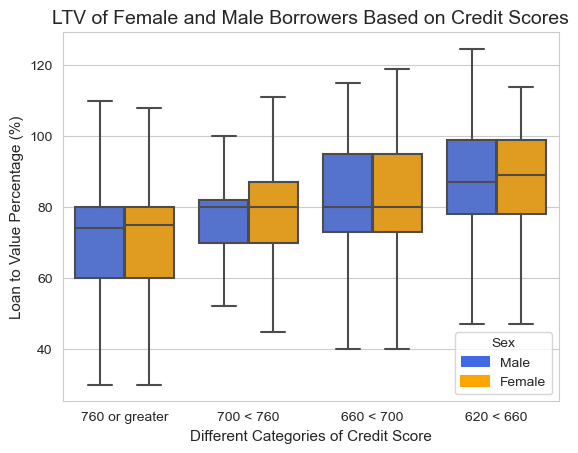

In [24]:
custom_palette = {0:'royalblue',1:'orange'}

sns.set_style('whitegrid')

ax = sns.boxplot(x='BorrowerCreditScore', y ='LTVRatioPercent', hue='FemaleBorrower',data=Data_full_merged,palette=custom_palette,showfliers=False, notch =False)

legend = plt.legend(title='Sex', loc='lower right',labels=['Male','Female'])

for handle, label in zip(legend.legend_handles, legend.get_texts()):
    if label.get_text()=='Male':
        handle.set_color('royalblue')
    elif label.get_text()=='Female':
        handle.set_color('orange')

plt.title('LTV of Female and Male Borrowers Based on Credit Scores', fontsize=14)
plt.xlabel('Different Categories of Credit Score', fontsize = 11)
plt.ylabel('Loan to Value Percentage (%)', fontsize = 11)

plt.show()

In [ ]:
sample_data = Data_full_merged.sample(n=50000)
g = sns.FacetGrid(sample_data,col='FemaleBorrower')
g.map_dataframe(sns.regplot,x='LTVRatioPercent',y='NoteAmount',scatter_kws={'alpha':0.3,'color':'royalblue'},line_kws={'color':'red'})

In [ ]:
# Calculating correlation coefficient for two groups.

Male_Data = Data_full_merged[Data_full_merged['FemaleBorrower'] == 0]

Female_Data =  Data_full_merged[Data_full_merged['FemaleBorrower'] == 1]

male_correlation = Male_Data['NoteAmount'].corr(Male_Data['LTVRatioPercent'])
male_rounded = round(male_correlation,3)
print("Correlation between NoteAmount and LTVRatioPercent for males:", male_rounded)

female_correlation = Female_Data['NoteAmount'].corr(Female_Data['LTVRatioPercent'])
female_rounded = round(female_correlation,3)
print("Correlation between NoteAmount and LTVRatioPercent for females:", female_rounded)


In [ ]:
sns.set_style('whitegrid')
g = sns.lmplot(x= 'LTVRatioPercent', y='NoteAmount',col='FemaleBorrower',hue='FemaleBorrower',data=sample_data)

trendline_colors = ['red','blue']

for ax, color in zip(g.axes.flatten(), trendline_colors):
    lines = ax.get_lines()
    for line in lines:
        if line.get_linestyle() == '-':
            line.set_color(color)
            
def y_axis_formatter(x,pos):
    return '{:,.0f}'.format(x)

for ax in g.axes.flatten():
    ax.yaxis.set_major_formatter(FuncFormatter(y_axis_formatter))
    
titles = ['Male Borrowers','Female Borrowers']
for ax,title in zip(g.axes.flatten(),titles):
    ax.set_title(title, fontsize=15, fontweight='bold', fontfamily='serif')

xlabel = 'LTV Ratio Percent (%)'
ylabel = 'Note Amount (Loan Value)'
for ax in g.axes.flatten():
    ax.set_xlabel(xlabel, fontsize = 12, fontweight='bold', fontfamily='sans-serif')
    ax.set_ylabel(ylabel, fontsize = 12, fontweight='bold', fontfamily='sans-serif')
    
for ax in g.axes.flatten():
    ax.tick_params(axis='x', labelsize = 12)
    ax.tick_params(axis='y', labelsize = 12)

notes = ['Note 1: Correlation Coefficient for Male Borrowers :0.093','Note 2: Correlation Coefficient for Female Borrowers :0.087']

for ax, note in zip(g.axes.flatten(), notes):
    ax.text(0.05,0.95,note,transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5',edgecolor='gray',facecolor='lightgray'))
    
plt.show()

In [29]:
Data_full_merged['MonthlyIncome1000s'] = Data_full_merged['TotalMonthlyIncomeAmount']/1000
Data_full_merged['NoteAmount1000s'] = Data_full_merged['NoteAmount']/1000
Data_full_merged['HUDMedianIncome1000s'] = Data_full_merged['HUDMedianIncomeAmount']/1000

In [71]:
Data_full_merged

,Year,FHLBankDistrict,CensusTractIdentifier,FIPSStateCode,FIPSCountyCode,CensusTractMinorityRatioPercent,CensusTractMedFamIncomeAmount,HUDMedianIncomeAmount,LocalAreaMedianIncomeAmount,LTVRatioPercent,...,BlackBorrower,FemaleBorrower,MonthlyIncome1000s,NoteAmount1000s,HUDMedianIncome1000s,StateName,Borrower760orGreater,LogNoteAmount,LogHUDMedianIncome,LogMonthlyIncome
0,2010,Boston,101.00,4,13,3.640,85567,66600,44769,78.54,...,0,1,17.649,322.0,66.6,AZ,1,12.682307,11.106460,9.778434
1,2010,Boston,726.00,9,1,24.220,44167,104300,64875,72.92,...,0,0,2.962,140.0,104.3,CT,1,11.849398,11.555027,7.993620
2,2010,Boston,612.00,9,1,11.320,65361,104300,64875,65.82,...,0,1,6.662,181.0,104.3,CT,0,12.106252,11.555027,8.804175
3,2010,Boston,431.00,9,1,17.000,93984,104300,64875,28.57,...,0,1,11.272,300.0,104.3,CT,1,12.611538,11.555027,9.330077
4,2010,Boston,2302.00,9,1,5.320,86553,104300,64875,65.00,...,0,0,8.458,292.0,104.3,CT,0,12.584509,11.555027,9.042868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83101,2020,Topeka,75.11,31,55,14.933,113850,86900,82564,80.00,...,0,0,22.145,380.0,86.9,NE,0,12.847927,11.372513,10.005367
83102,2020,Topeka,75.05,31,55,4.378,102125,86900,82564,51.00,...,0,0,13.034,215.0,86.9,NE,0,12.278393,11.372513,9.475317
83103,2020,Topeka,201.00,20,43,11.352,72083,63600,63438,80.00,...,0,0,5.156,88.0,63.6,KS,0,11.385092,11.060369,8.547916
83104,2020,Topeka,507.01,40,131,38.984,43417,67700,66697,90.00,...,0,0,4.521,81.0,67.7,OK,0,11.302204,11.122841,8.416488


In [ ]:
X = Data_full_merged[['MonthlyIncome1000s','BorrowerAge','WhiteBorrower','BorrowerFirstTimeHomebuyer', 'NoteAmount1000s','HUDMedianIncome1000s']]

y = Data_full_merged['LTVRatioPercent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Getting the intercept term

intercept = model.intercept_

# Getting beta coefficients 
beta_coefficients = pd.DataFrame({'Variable': ['Intercept'] + list(X.columns), 'Coefficient': [intercept] +list(model.coef_)})

print("Beta Coefficients:")
print(beta_coefficients)

y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

In [ ]:
imputer = SimpleImputer(strategy='mean')

Data_full_merged['BorrowerAge'] = imputer.fit_transform(Data_full_merged['BorrowerAge'].values.reshape(-1,1))

X = Data_full_merged[['MonthlyIncome1000s','BorrowerAge','WhiteBorrower','BorrowerFirstTimeHomebuyer', 'NoteAmount1000s','HUDMedianIncome1000s']]

y = Data_full_merged['LTVRatioPercent']

# Add constant term to the features matrix
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Print the summary of regression results
print(model.summary())

In [67]:
# Assuming X and y are defined as in your code
X = Data_full_merged[['MonthlyIncome1000s', 'BorrowerAge', 'WhiteBorrower', 'BorrowerFirstTimeHomebuyer', 'NoteAmount1000s', 'HUDMedianIncome1000s']]
y = Data_full_merged['LTVRatioPercent']

# Add constant term to the features matrix
X = sm.add_constant(X)

# Train the linear regression model on the entire dataset
model = sm.OLS(y, X).fit()

# Print the summary of regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        LTVRatioPercent   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     7551.
Date:                Sat, 18 May 2024   Prob (F-statistic):               0.00
Time:                        17:31:47   Log-Likelihood:            -6.4056e+05
No. Observations:              156431   AIC:                         1.281e+06
Df Residuals:                  156424   BIC:                         1.281e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
# Assuming X and y are defined as in your code
X = Data_full_merged[['MonthlyIncome1000s', 'BorrowerAge', 'WhiteBorrower', 'BorrowerFirstTimeHomebuyer', 'NoteAmount1000s', 'HUDMedianIncome1000s']]
y = Data_full_merged['LTVRatioPercent']

# Add constant term to the features matrix
X = sm.add_constant(X)

# Train the linear regression model on the entire dataset
model = sm.OLS(y, X).fit()

robust_model = model.get_robustcov_results(cov_type='HC3')
print(robust_model.summary())

In [37]:
vif_data = pd.DataFrame()
vif_data['Variable']=X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

print(vif_data)

                     Variable        VIF
0                       const  63.267387
1          MonthlyIncome1000s   1.063543
2                 BorrowerAge   1.105368
3               WhiteBorrower   1.028640
4  BorrowerFirstTimeHomebuyer   1.127633
5             NoteAmount1000s   1.341368
6        HUDMedianIncome1000s   1.252964


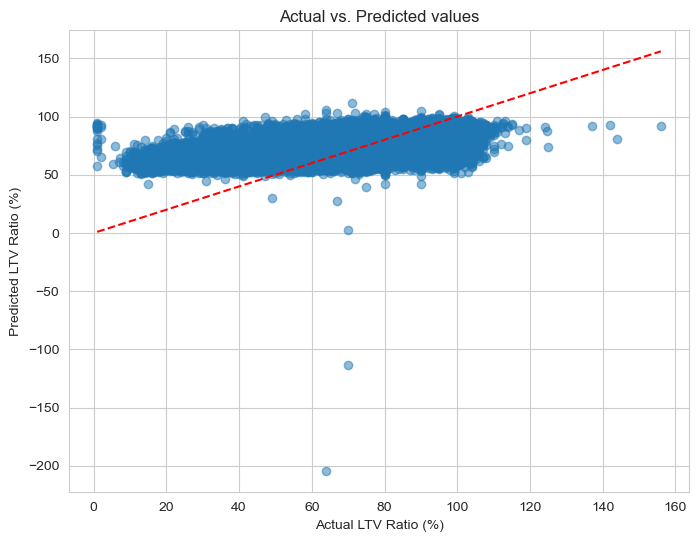

In [38]:
y_pred = model.predict(X)

plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(),y.max()],[y.min(),y.max()],'--', color='red')
plt.title('Actual vs. Predicted values')
plt.xlabel('Actual LTV Ratio (%)')
plt.ylabel('Predicted LTV Ratio (%)')
plt.grid(True)
plt.show()

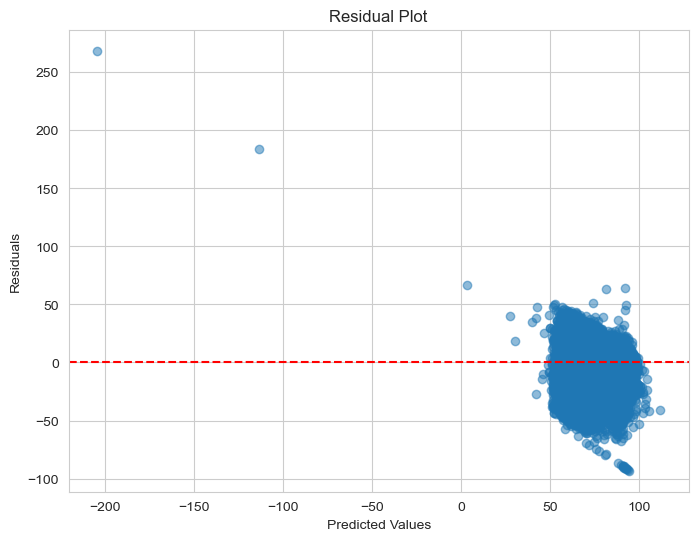

In [39]:
residuals = model.resid

plt.figure(figsize=(8,6))
plt.scatter(model.predict(X), residuals, alpha=0.5)
plt.axhline(y=0, color='red',linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


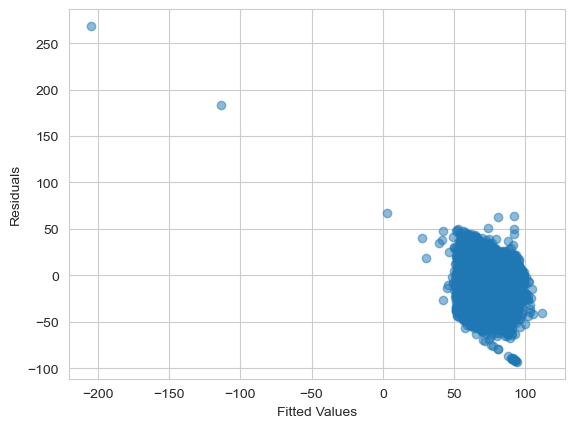

In [62]:
fitted_values = model.fittedvalues
residuals = model.resid

plt.scatter(fitted_values, residuals, alpha=0.5)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [40]:
# Breusch Pagan Test 

test_breusch = het_breuschpagan(model.resid,model.model.exog)
labels = ['LM Statistic','LM-Test p-value','F-Statistic', 'F-Test p-value']
print(dict(zip(labels,test_breusch)))

{'LM Statistic': 37642.39801441612, 'LM-Test p-value': 0.0, 'F-Statistic': 8261.418980980476, 'F-Test p-value': 0.0}


In [41]:
test_white = het_white(model.resid, model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, test_white)))

{'LM Statistic': 49067.740627520245, 'LM-Test p-value': 0.0, 'F-Statistic': 2859.242544499159, 'F-Test p-value': 0.0}


In [72]:
WLS_weight = 1/np.sqrt(np.abs(fitted_values))
wls_model = sm.WLS(y,X,weights=WLS_weight).fit()
print(wls_model.summary())

                            WLS Regression Results                            
Dep. Variable:        LTVRatioPercent   R-squared:                       0.220
Model:                            WLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     7368.
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        18:10:45   Log-Likelihood:            -6.4189e+05
No. Observations:              156431   AIC:                         1.284e+06
Df Residuals:                  156424   BIC:                         1.284e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

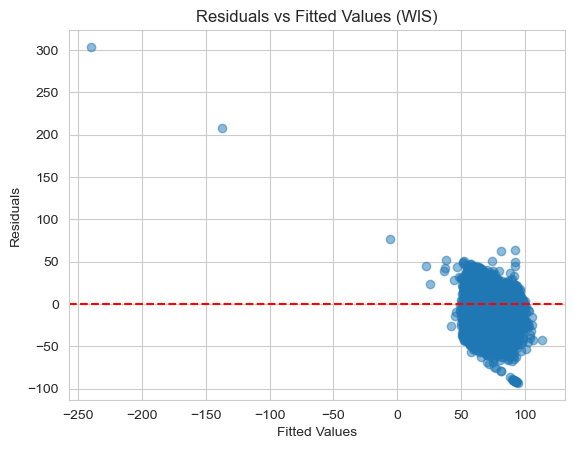

In [73]:
fitted_values_wls = wls_model.fittedvalues
residuals_wls = wls_model.resid

plt.scatter(fitted_values_wls, residuals_wls, alpha=0.5)
plt.axhline(y=0, color='red',linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (WlS)')
plt.show()

In [76]:
test_wls = het_breuschpagan(wls_model.resid, wls_model.model.exog)
labels = ['LM Statistic','LM-Test p-value','F-Statistic', 'F-Test p-value']
print(dict(zip(labels,test_wls)))

{'LM Statistic': 49089.85610888096, 'LM-Test p-value': 0.0, 'F-Statistic': 11922.784022382231, 'F-Test p-value': 0.0}


In [42]:
state_fips_to_abbreviation = {
    1: 'AL', 2: 'AK', 4: 'AZ', 5: 'AR', 6: 'CA', 8: 'CO', 9: 'CT', 10: 'DE',
    11: 'DC', 12: 'FL', 13: 'GA', 15: 'HI', 16: 'ID', 17: 'IL', 18: 'IN', 19: 'IA',
    20: 'KS', 21: 'KY', 22: 'LA', 23: 'ME', 24: 'MD', 25: 'MA', 26: 'MI', 27: 'MN',
    28: 'MS', 29: 'MO', 30: 'MT', 31: 'NE', 32: 'NV', 33: 'NH', 34: 'NJ', 35: 'NM',
    36: 'NY', 37: 'NC', 38: 'ND', 39: 'OH', 40: 'OK', 41: 'OR', 42: 'PA', 44: 'RI',
    45: 'SC', 46: 'SD', 47: 'TN', 48: 'TX', 49: 'UT', 50: 'VT', 51: 'VA', 53: 'WA',
    54: 'WV', 55: 'WI', 56: 'WY'
}

def map_fips_to_abbreviation(fips_code):
    return state_fips_to_abbreviation.get(fips_code,'Unknown')

Data_full_merged['StateName'] = Data_full_merged['FIPSStateCode'].apply(map_fips_to_abbreviation)

In [43]:
Data_full_merged

,Year,FHLBankDistrict,CensusTractIdentifier,FIPSStateCode,FIPSCountyCode,CensusTractMinorityRatioPercent,CensusTractMedFamIncomeAmount,HUDMedianIncomeAmount,LocalAreaMedianIncomeAmount,LTVRatioPercent,...,MortgageAcquired,BorrowerCount,TotalDebtExpenseRatioPercent,WhiteBorrower,BlackBorrower,FemaleBorrower,MonthlyIncome1000s,NoteAmount1000s,HUDMedianIncome1000s,StateName
0,2010,Boston,101.00,4,13,3.640,85567,66600,44769,78.54,...,2010,2,NaN,1,0,1,17.649,322.0,66.6,AZ
1,2010,Boston,726.00,9,1,24.220,44167,104300,64875,72.92,...,2010,2,NaN,1,0,0,2.962,140.0,104.3,CT
2,2010,Boston,612.00,9,1,11.320,65361,104300,64875,65.82,...,2010,1,NaN,1,0,1,6.662,181.0,104.3,CT
3,2010,Boston,431.00,9,1,17.000,93984,104300,64875,28.57,...,2010,2,NaN,1,0,1,11.272,300.0,104.3,CT
4,2010,Boston,2302.00,9,1,5.320,86553,104300,64875,65.00,...,2010,2,NaN,0,0,0,8.458,292.0,104.3,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83101,2020,Topeka,75.11,31,55,14.933,113850,86900,82564,80.00,...,2020,2,25.77,1,0,0,22.145,380.0,86.9,NE
83102,2020,Topeka,75.05,31,55,4.378,102125,86900,82564,51.00,...,2020,2,21.43,1,0,0,13.034,215.0,86.9,NE
83103,2020,Topeka,201.00,20,43,11.352,72083,63600,63438,80.00,...,2020,2,31.08,1,0,0,5.156,88.0,63.6,KS
83104,2020,Topeka,507.01,40,131,38.984,43417,67700,66697,90.00,...,2020,1,43.00,1,0,0,4.521,81.0,67.7,OK


In [ ]:
aggregate_income = Data_full_merged.groupby(['StateName']).agg({'TotalMonthlyIncomeAmount':'median'}).reset_index()
aggregate_income['TotalMonthlyIncomeAmount']=aggregate_income['TotalMonthlyIncomeAmount'].round(2)

print(aggregate_income.head(10))

In [41]:
AK_income = Data_full_merged[Data_full_merged['StateName']=='AK']

unique_income = AK_income['TotalMonthlyIncomeAmount'].unique()

print(unique_income)

[    0. 80044. 12125.]


In [ ]:

Income_Map = px.choropleth(
    aggregate_income,
    locations = 'StateName',
    locationmode='USA-states',
    color='TotalMonthlyIncomeAmount',
    scope='usa',
    color_continuous_scale='OrRd',
    labels={'TotalMonthlyIncomeAmount':'Median Monthly Income'},
    title='Median Monthly Income Amount by State',
)

Income_Map.show()

In [ ]:
pio.write_image(Income_Map,'IncomeMap.jpg', width=800, height=600, scale=2)

In [ ]:
Data_full_merged['StateName'].value_counts()

In [46]:
# Creating a dummy variable for borrower credit score of 760 or above
Data_full_merged['Borrower760orGreater'] = Data_full_merged.BorrowerCreditScore.map({'620 < 660':0,'660 < 700':0,'700 < 760':0,'760 or greater':1})

In [ ]:
X = Data_full_merged[['BorrowerAge','MonthlyIncome1000s','NoteAmount1000s','WhiteBorrower','LTVRatioPercent','FemaleBorrower','NoteRatePercent','BorrowerSelfEmployed']]

y = Data_full_merged['Borrower760orGreater']

X = sm.add_constant(X)

logit_model = sm.Logit(y,X).fit()

marginal_effects = logit_model.get_margeff()

print(marginal_effects.summary())

In [ ]:
X = Data_full_merged[['BorrowerAge','MonthlyIncome1000s','NoteAmount1000s','WhiteBorrower','LTVRatioPercent','FemaleBorrower','NoteRatePercent','BorrowerSelfEmployed']]

y = Data_full_merged['Borrower760orGreater']

X = sm.add_constant(X)

LPM_model = sm.OLS(y,X).fit()

print(LPM_model.summary())

In [ ]:
avg_income_by_state = Data_full_merged.groupby('StateName')['TotalMonthlyIncomeAmount'].mean().reset_index()

avg_income_by_state['TotalMonthlyIncomeAmount']=avg_income_by_state['TotalMonthlyIncomeAmount'].round(2)

avg_income_by_state = avg_income_by_state.sort_values(by='TotalMonthlyIncomeAmount', ascending=False)

top_10_states = avg_income_by_state.head(10)

palette = sns.color_palette('husl',10)

plt.figure(figsize=(10,6), facecolor='lightgray')
bars = plt.bar(top_10_states['StateName'], top_10_states['TotalMonthlyIncomeAmount'], color=palette)
#plt.bar(top_10_states['StateName'],top_10_states['TotalMonthlyIncomeAmount'],color=palette)
plt.title('Average Total Monthly Income for Top 10 States', fontsize= 16, fontweight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Total Monthly Income', fontsize=14)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)

formatter = FuncFormatter(lambda x, _: '${:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

for bar,income in zip(bars,top_10_states['TotalMonthlyIncomeAmount']):
    plt.text(bar.get_x() + bar.get_width()/2,bar.get_height()-200,'${:,.0f}'.format(income),ha='center',va='top',fontsize=11,color='black')
    
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
filtered_data =Data_full_merged[Data_full_merged['StateName'].isin(top_10_states['StateName'])]

avg_income_yr = filtered_data.groupby(['StateName','Year'])['TotalMonthlyIncomeAmount'].mean().reset_index()

avg_income_yr['TotalMonthlyIncomeAmount']=avg_income_yr['TotalMonthlyIncomeAmount'].round(2)

palette = sns.color_palette('husl',len(avg_income_yr['Year'].unique()))

def update_plot(year):
    plt.cla()
    plt.bar(avg_income_yr[avg_income_yr['Year']==year]['StateName'],
            avg_income_yr[avg_income_yr['Year']==year]['TotalMonthlyIncomeAmount'],
            color=palette)
    plt.title('Average Total Monthly Income for Year {}'.format(year), fontsize=16)
    plt.xlabel('State', fontsize=14)
    plt.ylabel('Average Total Monthly Income', fontsize=14)
    plt.xticks(rotation=45,fontsize=12)
    plt.yticks(fontsize=12)
    
    formatter = FuncFormatter(lambda x, _: '${:,.0f}'.format(x))
    plt.gca().yaxis.set_major_formatter(formatter)
    
    plt.grid(axis='y',linestyle='--',alpha=0.7)
    plt.tight_layout()
    plt.show()
    
year_dropdown = widgets.Dropdown(options=avg_income_yr['Year'].unique(), description='Year')

widgets.interactive(update_plot, year=year_dropdown)

In [ ]:
custom_palette = {0:'royalblue',1:'orange'}

fig = go.Figure()

for credit_score in Data_full_merged['BorrowerCreditScore'].unique():
    for gender in Data_full_merged['FemaleBorrower'].unique():
        gender_df = Data_full_merged[(Data_full_merged['BorrowerCreditScore'] == credit_score) & (Data_full_merged['FemaleBorrower'] == gender)]
        fig.add_trace(go.Box(
            x=[credit_score + (' Female' if gender == 1 else ' Male')] * len(gender_df),
            y=gender_df['LTVRatioPercent'],
            name=f"{credit_score} {'Female' if gender == 1 else 'Male'}",
            marker_color=custom_palette[gender],
            showlegend=True if credit_score == 'Low' else False,
            boxpoints=False,
            boxmean=True
        ))

fig.update_layout(
    title='LTV of Female and Male Borrowers Based on Credit Scores',
    xaxis_title='Different Categories of Credit Score',
    yaxis_title='Loan to Value Percentage (%)',
    legend_title ='Sex'
)

app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1(children='Dashboard'),
    
    html.Div(children='LTV of Female and Male Borrowers Based on Credit Scores.'),
    
    dcc.Graph(
        id='boxplot',
        figure=fig 
    )
])

if __name__ == '__main__':
    app.run_server()

In [ ]:
Data_full_merged['BorrowerRace'] = pd.Categorical(Data_full_merged['BorrowerRace'])

fixed_model = sm.OLS(Data_full_merged['LTVRatioPercent'],sm.add_constant(Data_full_merged[['MonthlyIncome1000s','BorrowerAge','WhiteBorrower','BorrowerFirstTimeHomebuyer','NoteAmount1000s','HUDMedianIncome1000s']])).fit(cov_type='cluster',cov_kwds={'groups':Data_full_merged['BorrowerRace']})

print(fixed_model.summary())

In [52]:
 # Perform T test Comparing mean incomes of males and females

male_monthly_income = Data_full_merged[Data_full_merged['FemaleBorrower'] == 0]['TotalMonthlyIncomeAmount']

female_monthly_income =Data_full_merged[Data_full_merged['FemaleBorrower'] == 1]['TotalMonthlyIncomeAmount']

t_stat, p_value =stats.ttest_ind(male_monthly_income,female_monthly_income)

print("T-Stat:", t_stat)
print('P-Value:', p_value)

T-Stat: 23.29702833344468
P-Value: 7.613529558149651e-120


Text(0, 0.5, 'Density')

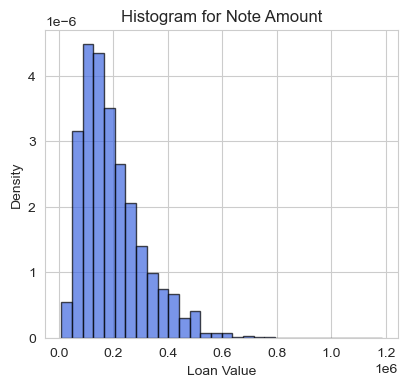

In [58]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(Data_full_merged['NoteAmount'], bins =30, density=True, alpha=0.7,color='royalblue',edgecolor='black')
plt.title("Histogram for Note Amount")
plt.xlabel("Loan Value")
plt.ylabel("Density")

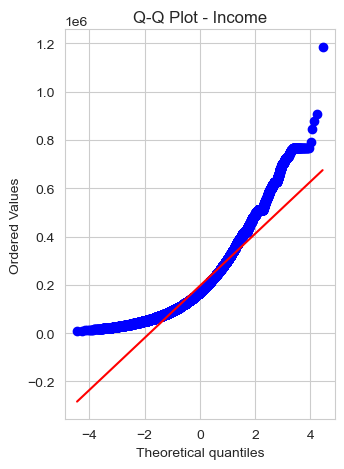

In [59]:
plt.subplot(1,2,2)
stats.probplot(Data_full_merged['NoteAmount'], dist='norm', plot=plt)
plt.title('Q-Q Plot - Income')

plt.tight_layout()
plt.show()

In [ ]:
Data_full_merged['LogNoteAmount'] = np.log(Data_full_merged['NoteAmount'])
Data_full_merged['LogHUDMedianIncome'] = np.log(Data_full_merged['HUDMedianIncomeAmount'])

In [ ]:
zero_count_income = (Data_full_merged['TotalMonthlyIncomeAmount'] == 0).sum()
print(zero_count_income)

In [ ]:
mean_value = Data_full_merged['TotalMonthlyIncomeAmount'].replace(0, pd.NA).mean()

Data_full_merged['TotalMonthlyIncomeAmount'] = Data_full_merged['TotalMonthlyIncomeAmount'].replace(0, mean_value)

In [78]:
Data_full_merged['LogTotalMonthlyIncome1'] = np.log(Data_full_merged['TotalMonthlyIncomeAmount'])

In [79]:
Data_full_merged

,Year,FHLBankDistrict,CensusTractIdentifier,FIPSStateCode,FIPSCountyCode,CensusTractMinorityRatioPercent,CensusTractMedFamIncomeAmount,HUDMedianIncomeAmount,LocalAreaMedianIncomeAmount,LTVRatioPercent,...,FemaleBorrower,MonthlyIncome1000s,NoteAmount1000s,HUDMedianIncome1000s,StateName,Borrower760orGreater,LogNoteAmount,LogHUDMedianIncome,LogMonthlyIncome,LogTotalMonthlyIncome1
0,2010,Boston,101.00,4,13,3.640,85567,66600,44769,78.54,...,1,17.649,322.0,66.6,AZ,1,12.682307,11.106460,9.778434,9.778434
1,2010,Boston,726.00,9,1,24.220,44167,104300,64875,72.92,...,0,2.962,140.0,104.3,CT,1,11.849398,11.555027,7.993620,7.993620
2,2010,Boston,612.00,9,1,11.320,65361,104300,64875,65.82,...,1,6.662,181.0,104.3,CT,0,12.106252,11.555027,8.804175,8.804175
3,2010,Boston,431.00,9,1,17.000,93984,104300,64875,28.57,...,1,11.272,300.0,104.3,CT,1,12.611538,11.555027,9.330077,9.330077
4,2010,Boston,2302.00,9,1,5.320,86553,104300,64875,65.00,...,0,8.458,292.0,104.3,CT,0,12.584509,11.555027,9.042868,9.042868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83101,2020,Topeka,75.11,31,55,14.933,113850,86900,82564,80.00,...,0,22.145,380.0,86.9,NE,0,12.847927,11.372513,10.005367,10.005367
83102,2020,Topeka,75.05,31,55,4.378,102125,86900,82564,51.00,...,0,13.034,215.0,86.9,NE,0,12.278393,11.372513,9.475317,9.475317
83103,2020,Topeka,201.00,20,43,11.352,72083,63600,63438,80.00,...,0,5.156,88.0,63.6,KS,0,11.385092,11.060369,8.547916,8.547916
83104,2020,Topeka,507.01,40,131,38.984,43417,67700,66697,90.00,...,0,4.521,81.0,67.7,OK,0,11.302204,11.122841,8.416488,8.416488


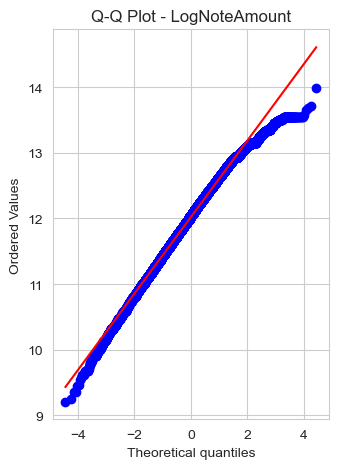

In [60]:
plt.subplot(1,2,2)
stats.probplot(Data_full_merged['LogNoteAmount'], dist='norm', plot=plt)
plt.title('Q-Q Plot - LogNoteAmount')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Density')

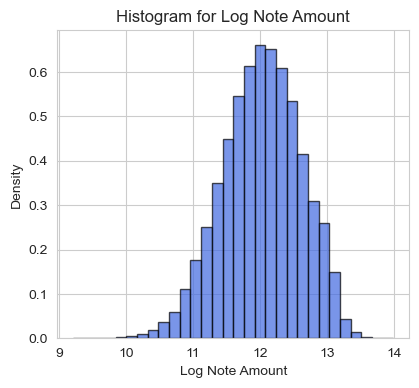

In [61]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(Data_full_merged['LogNoteAmount'], bins =30, density=True, alpha=0.7,color='royalblue',edgecolor='black')
plt.title("Histogram for Log Note Amount")
plt.xlabel("Log Note Amount")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

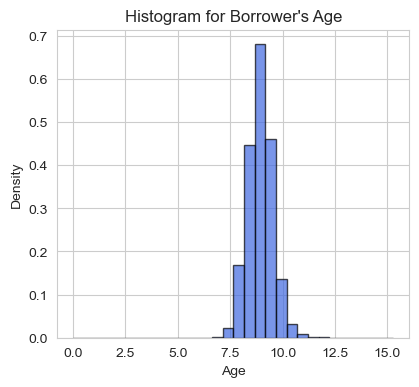

In [83]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(Data_full_merged['BorrowerAge'], bins =30, density=True, alpha=0.7,color='royalblue',edgecolor='black')
plt.title("Histogram for Borrower's Age")
plt.xlabel("Age")
plt.ylabel("Density")

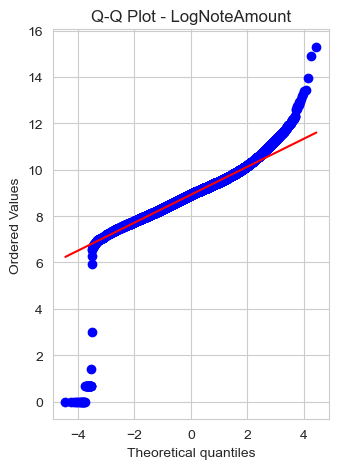

In [82]:
plt.subplot(1,2,2)
stats.probplot(Data_full_merged['LogTotalMonthlyIncome1'], dist='norm', plot=plt)
plt.title('Q-Q Plot - LogNoteAmount')

plt.tight_layout()
plt.show()

In [88]:
X = Data_full_merged[['BorrowerAge','LogHUDMedianIncome','LogNoteAmount','BorrowerFirstTimeHomebuyer','WhiteBorrower','FemaleBorrower','LogTotalMonthlyIncome1','BorrowerSelfEmployed']]

y = Data_full_merged['LTVRatioPercent']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        LTVRatioPercent   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     7472.
Date:                Sat, 18 May 2024   Prob (F-statistic):               0.00
Time:                        17:55:34   Log-Likelihood:            -6.3514e+05
No. Observations:              156431   AIC:                         1.270e+06
Df Residuals:                  156422   BIC:                         1.270e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               